### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# 2. Linear Regression

### Outliers Included, Categories Not Balanced

#### Audrey Hughes Rager
#### December 30, 2020


## Import Packages

In [84]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


<h2>Data Wrangling</h2>

In [85]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")
df = pd.read_csv('winequality-white.csv',sep=";")
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)

df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [86]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [87]:
sm.__version__

'0.12.0'

## Model 1


In [88]:
ym1 = df.quality
Xm1 = df.drop(['quality'],axis=1)
from sklearn.model_selection import train_test_split
Xm1_train, Xm1_test, ym1_train, ym1_test = train_test_split(Xm1, ym1, test_size=0.25, random_state=101)
Xm1_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2287,6.7,0.43,0.23,5.00,0.157,49.0,145.0,0.99471,3.17,0.49,9.4
2300,7.3,0.30,0.33,2.30,0.043,28.0,125.0,0.99084,3.34,0.44,12.6
3591,6.4,0.28,0.36,1.30,0.053,28.0,186.0,0.99211,3.31,0.45,10.8
3614,6.4,0.38,0.24,7.20,0.047,41.0,151.0,0.99604,3.11,0.60,9.2
2634,8.7,0.31,0.73,14.35,0.044,27.0,191.0,1.00013,2.96,0.88,8.7


In [89]:
Xm1_train.shape

(3673, 11)

In [90]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(Xm1_train,ym1_train)
print('Estimated intercept coefficient:',lm1.intercept_)
print ('Number of coefficients:', len(lm1.coef_))
coeffm1_df = pd.DataFrame(lm1.coef_,Xm1.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: 143.952536302889
Number of coefficients: 11


,Coefficient
fixed_acidity,0.045472
volatile_acidity,-1.815218
citric_acid,0.011121
residual_sugar,0.078556
chlorides,-0.431530
free_sulfur_dioxide,0.004660
total_sulfur_dioxide,-0.000387
density,-143.561669
pH,0.563637
sulphates,0.667412


In [91]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
ym1, Xm1 = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vifm1 = pd.DataFrame()
vifm1['VIF'] = [variance_inflation_factor(Xm1.values, i) for i in range(Xm1.shape[1])]
vifm1['variable'] = Xm1.columns

#view VIF for each explanatory variable 
vifm1

,VIF,variable
0,3.067856e+06,Intercept
1,2.691435e+00,fixed_acidity
2,1.141156e+00,volatile_acidity
3,1.165215e+00,citric_acid
4,1.264406e+01,residual_sugar
5,1.236822e+00,chlorides
6,1.787880e+00,free_sulfur_dioxide
7,2.239233e+00,total_sulfur_dioxide
8,2.823255e+01,density
9,2.196362e+00,pH


In [92]:
predictions_m1 = lm1.predict(Xm1_test)

**Predicted vs. Actual**

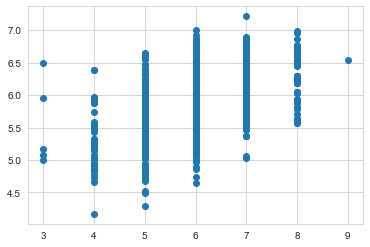

In [93]:
plt.scatter(ym1_test,predictions_m1)

**Residual Histogram**

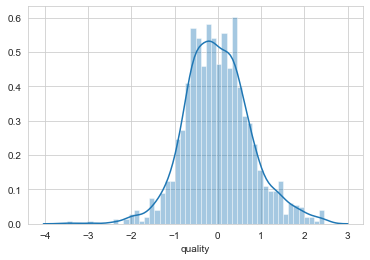

In [94]:
sns.distplot((ym1_test-predictions_m1),bins=50);

In [95]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym1_test, predictions_m1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym1_test, predictions_m1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym1_test, predictions_m1)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym1_test, predictions_m1))
print('Explained Variance:', metrics.explained_variance_score(ym1_test, predictions_m1))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym1_test, predictions_m1))
print('Median Absolute Error:', metrics.median_absolute_error(ym1_test, predictions_m1))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym1_test, predictions_m1))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym1_test, predictions_m1))



R-squared: 0.27411497036158483
Mean Squared Error (MSE): 0.5819734399456571
Root Mean Squared Error (RMSE): 0.762871837169034
Log Mean Squared Error: 0.012696971403151895
Explained Variance: 0.2741149819110832
Mean Absolute Error (MAE): 0.5916037123365229
Median Absolute Error: 0.48349570777801887
Poisson Deviance: 0.09955379194269647
Mean Gamma Deviance: 0.017342290822676968


## Model 2 -  Drop Density For High VIF

In [96]:
ym2 = df.quality
Xm2 = df.drop(['quality','density'],axis=1)
from sklearn.model_selection import train_test_split
Xm2_train, Xm2_test, ym2_train, ym2_test = train_test_split(Xm2, ym2, test_size=0.25, random_state=101)
Xm2_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
2287,6.7,0.43,0.23,5.00,0.157,49.0,145.0,3.17,0.49,9.4
2300,7.3,0.30,0.33,2.30,0.043,28.0,125.0,3.34,0.44,12.6
3591,6.4,0.28,0.36,1.30,0.053,28.0,186.0,3.31,0.45,10.8
3614,6.4,0.38,0.24,7.20,0.047,41.0,151.0,3.11,0.60,9.2
2634,8.7,0.31,0.73,14.35,0.044,27.0,191.0,2.96,0.88,8.7


In [97]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(Xm2_train,ym2_train)
print('Estimated intercept coefficient:',lm2.intercept_)
print ('Number of coefficients:', len(lm2.coef_))
coeffm2_df = pd.DataFrame(lm2.coef_,Xm2.columns,columns=['Coefficient'])
coeffm2_df

Estimated intercept coefficient: 2.5003909970853795
Number of coefficients: 10


,Coefficient
fixed_acidity,-0.064722
volatile_acidity,-1.926975
citric_acid,-0.045383
residual_sugar,0.024023
chlorides,-1.099982
free_sulfur_dioxide,0.005728
total_sulfur_dioxide,-0.000928
pH,0.057598
sulphates,0.469519
alcohol,0.359635


In [98]:
predictions_m2 = lm2.predict(Xm2_test)

**Predicted vs. Actual**

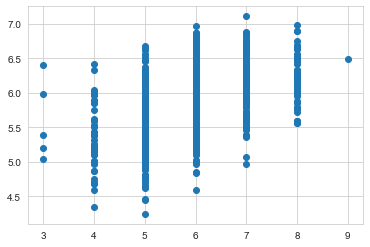

In [99]:
plt.scatter(ym2_test,predictions_m2)

**Residual Histogram**

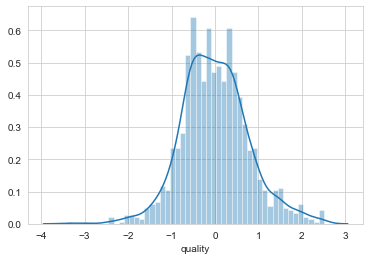

In [100]:
sns.distplot((ym2_test-predictions_m2),bins=50);

In [101]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym2_test, predictions_m2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym2_test, predictions_m2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym2_test, predictions_m2)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym2_test, predictions_m2))
print('Explained Variance:', metrics.explained_variance_score(ym2_test, predictions_m2))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym2_test, predictions_m2))
print('Median Absolute Error:', metrics.median_absolute_error(ym2_test, predictions_m2))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym2_test, predictions_m2))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym2_test, predictions_m2))



R-squared: 0.26509520406978937
Mean Squared Error (MSE): 0.5892049768998726
Root Mean Squared Error (RMSE): 0.7675968843734794
Log Mean Squared Error: 0.01285777638199399
Explained Variance: 0.26510013080953776
Mean Absolute Error (MAE): 0.5959639817162875
Median Absolute Error: 0.49020306093928845
Poisson Deviance: 0.1007965909260457
Mean Gamma Deviance: 0.01755817337655694


In [102]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
ym2, Xm2 = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vifm2 = pd.DataFrame()
vifm2['VIF'] = [variance_inflation_factor(Xm2.values, i) for i in range(Xm2.shape[1])]
vifm2['variable'] = Xm2.columns

#view VIF for each explanatory variable 
vifm2

,VIF,variable
0,1039.129803,Intercept
1,1.356128,fixed_acidity
2,1.128298,volatile_acidity
3,1.159884,citric_acid
4,1.435215,residual_sugar
5,1.203645,chlorides
6,1.744627,free_sulfur_dioxide
7,2.153170,total_sulfur_dioxide
8,1.330912,pH
9,1.056637,sulphates


## Backward Elimination Method to create subsequent models

## Model 3: Drop Total Sulfur Dioxide


In [103]:
ym3 = df.quality
Xm3 = df.drop(['quality','density','total_sulfur_dioxide'],axis=1)
from sklearn.model_selection import train_test_split
Xm3_train, Xm3_test, ym3_train, ym3_test = train_test_split(Xm3, ym3, test_size=0.25, random_state=101)
Xm3_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,pH,sulphates,alcohol
2287,6.7,0.43,0.23,5.00,0.157,49.0,3.17,0.49,9.4
2300,7.3,0.30,0.33,2.30,0.043,28.0,3.34,0.44,12.6
3591,6.4,0.28,0.36,1.30,0.053,28.0,3.31,0.45,10.8
3614,6.4,0.38,0.24,7.20,0.047,41.0,3.11,0.60,9.2
2634,8.7,0.31,0.73,14.35,0.044,27.0,2.96,0.88,8.7


In [104]:
Xm3_train.shape

(3673, 9)

In [105]:
from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3.fit(Xm3_train,ym3_train)
print('Estimated intercept coefficient:',lm3.intercept_)
print ('Number of coefficients:', len(lm3.coef_))
coeffm1_df = pd.DataFrame(lm3.coef_,Xm3.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: 2.493963989194946
Number of coefficients: 9


,Coefficient
fixed_acidity,-0.069751
volatile_acidity,-1.993444
citric_acid,-0.059616
residual_sugar,0.023051
chlorides,-1.153843
free_sulfur_dioxide,0.004507
pH,0.031529
sulphates,0.437891
alcohol,0.367818


In [106]:
predictions_m3 = lm3.predict(Xm3_test)

**Predicted vs. Actual**

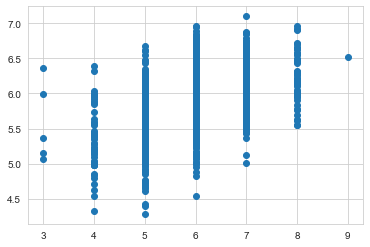

In [107]:
plt.scatter(ym3_test,predictions_m3)

**Residual Histogram**

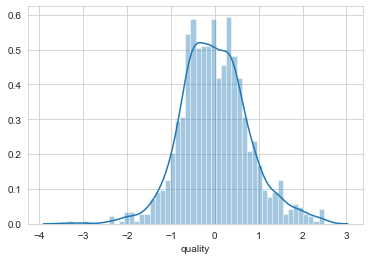

In [108]:
sns.distplot((ym3_test-predictions_m3),bins=50);

In [109]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym3_test, predictions_m3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym3_test, predictions_m3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym3_test, predictions_m3)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym3_test, predictions_m3))
print('Explained Variance:', metrics.explained_variance_score(ym3_test, predictions_m3))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym3_test, predictions_m3))
print('Median Absolute Error:', metrics.median_absolute_error(ym3_test, predictions_m3))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym3_test, predictions_m3))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym3_test, predictions_m3))



R-squared: 0.26468117010987735
Mean Squared Error (MSE): 0.5895369258422889
Root Mean Squared Error (RMSE): 0.7678130800151095
Log Mean Squared Error: 0.012857010136497721
Explained Variance: 0.2646894788104839
Mean Absolute Error (MAE): 0.5964134577115189
Median Absolute Error: 0.4910005935716155
Poisson Deviance: 0.1008325825563816
Mean Gamma Deviance: 0.017560698774094687


## Model 4: Drop Free Sulfur Dioxide

In [110]:
ym4 = df.quality
Xm4 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide'],axis=1)
from sklearn.model_selection import train_test_split
Xm4_train, Xm4_test, ym4_train, ym4_test = train_test_split(Xm4, ym4, test_size=0.25, random_state=101)
Xm4_train.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,pH,sulphates,alcohol
2287,6.7,0.43,0.23,5.00,0.157,3.17,0.49,9.4
2300,7.3,0.30,0.33,2.30,0.043,3.34,0.44,12.6
3591,6.4,0.28,0.36,1.30,0.053,3.31,0.45,10.8
3614,6.4,0.38,0.24,7.20,0.047,3.11,0.60,9.2
2634,8.7,0.31,0.73,14.35,0.044,2.96,0.88,8.7


In [111]:
Xm4_train.shape

(3673, 8)

In [112]:
lm4 = LinearRegression()
lm4.fit(Xm4_train,ym4_train)
print('Estimated intercept coefficient:',lm4.intercept_)
print ('Number of coefficients:', len(lm4.coef_))
coeffm4_df = pd.DataFrame(lm4.coef_,Xm4.columns,columns=['Coefficient'])
coeffm4_df

Estimated intercept coefficient: 2.7104732485782757
Number of coefficients: 8


,Coefficient
fixed_acidity,-0.078696
volatile_acidity,-2.062295
citric_acid,-0.001889
residual_sugar,0.026697
chlorides,-1.030577
pH,0.047746
sulphates,0.466914
alcohol,0.359302


In [113]:
predictions_m4 = lm4.predict(Xm4_test)

**Predicted vs. Actual**

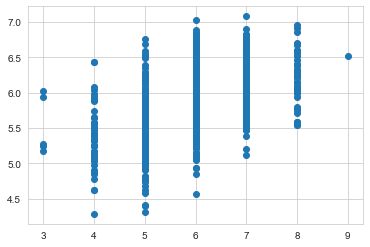

In [114]:
plt.scatter(ym1_test,predictions_m4)

**Residual Histogram**

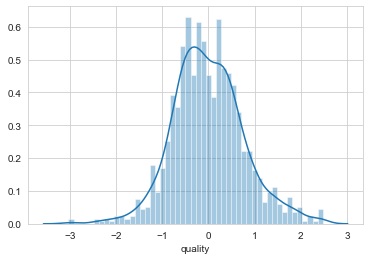

In [115]:
sns.distplot((ym4_test-predictions_m4),bins=50);

## Model 5: Drop Fixed Acidity


In [116]:
ym5 = df.quality
Xm5 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity'],axis=1)
from sklearn.model_selection import train_test_split
Xm5_train, Xm5_test, ym5_train, ym5_test = train_test_split(Xm5, ym5, test_size=0.25, random_state=101)
Xm5_train.head()




,volatile_acidity,citric_acid,residual_sugar,chlorides,pH,sulphates,alcohol
2287,0.43,0.23,5.00,0.157,3.17,0.49,9.4
2300,0.30,0.33,2.30,0.043,3.34,0.44,12.6
3591,0.28,0.36,1.30,0.053,3.31,0.45,10.8
3614,0.38,0.24,7.20,0.047,3.11,0.60,9.2
2634,0.31,0.73,14.35,0.044,2.96,0.88,8.7


In [117]:
Xm5_train.shape

(3673, 7)

In [118]:
from sklearn.linear_model import LinearRegression
lm5 = LinearRegression()
lm5.fit(Xm5_train,ym5_train)
print('Estimated intercept coefficient:',lm5.intercept_)
print ('Number of coefficients:', len(lm5.coef_))
coeffm5_df = pd.DataFrame(lm5.coef_,Xm5.columns,columns=['Coefficient'])
coeffm5_df

Estimated intercept coefficient: 1.6019105146305712
Number of coefficients: 7


,Coefficient
volatile_acidity,-2.068992
citric_acid,-0.135296
residual_sugar,0.027140
chlorides,-0.816996
pH,0.219374
sulphates,0.458582
alcohol,0.364972


In [119]:
predictions_m5 = lm5.predict(Xm5_test)

**Predicted vs. Actual**

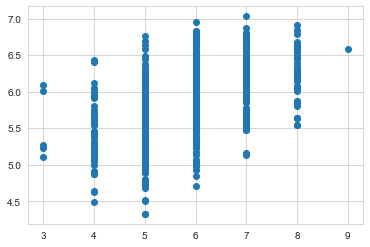

In [120]:
plt.scatter(ym5_test,predictions_m5)

**Residual Histogram**

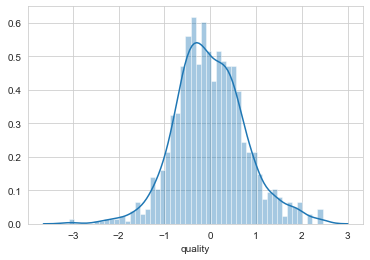

In [121]:
sns.distplot((ym5_test-predictions_m5),bins=50);

In [122]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym5_test, predictions_m5))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym5_test, predictions_m5))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym5_test, predictions_m5)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym5_test, predictions_m5))
print('Explained Variance:', metrics.explained_variance_score(ym5_test, predictions_m5))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym5_test, predictions_m5))
print('Median Absolute Error:', metrics.median_absolute_error(ym5_test, predictions_m5))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym5_test, predictions_m5))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym5_test, predictions_m5))



R-squared: 0.27090819031010827
Mean Squared Error (MSE): 0.5845444542819584
Root Mean Squared Error (RMSE): 0.7645550694894112
Log Mean Squared Error: 0.012762438586606325
Explained Variance: 0.2709164085838651
Mean Absolute Error (MAE): 0.5961532245399979
Median Absolute Error: 0.48955066660660496
Poisson Deviance: 0.09994230032931806
Mean Gamma Deviance: 0.017403392098669465



## Model 6: Drop Residual Sugar



In [123]:
ym6 = df.quality
Xm6 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar'],axis=1)
from sklearn.model_selection import train_test_split
Xm6_train, Xm6_test, ym6_train, ym6_test = train_test_split(Xm6, ym6, test_size=0.25, random_state=101)
Xm6_train.head()


,volatile_acidity,citric_acid,chlorides,pH,sulphates,alcohol
2287,0.43,0.23,0.157,3.17,0.49,9.4
2300,0.30,0.33,0.043,3.34,0.44,12.6
3591,0.28,0.36,0.053,3.31,0.45,10.8
3614,0.38,0.24,0.047,3.11,0.60,9.2
2634,0.31,0.73,0.044,2.96,0.88,8.7


In [124]:
Xm6_train.shape

(3673, 6)

In [125]:
from sklearn.linear_model import LinearRegression
lm6 = LinearRegression()
lm6.fit(Xm6_train,ym6_train)
print('Estimated intercept coefficient:',lm6.intercept_)
print ('Number of coefficients:', len(lm6.coef_))
coeffm6_df = pd.DataFrame(lm6.coef_,Xm6.columns,columns=['Coefficient'])
coeffm6_df


Estimated intercept coefficient: 2.6788909686910563
Number of coefficients: 6


,Coefficient
volatile_acidity,-1.911859
citric_acid,-0.066083
chlorides,-1.449114
pH,0.102342
sulphates,0.436522
alcohol,0.312082


In [126]:
predictions_m6 = lm6.predict(Xm6_test)

**Predicted vs. Actual**

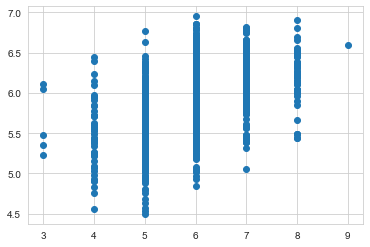

In [127]:
plt.scatter(ym6_test,predictions_m6)

**Residual Histogram**

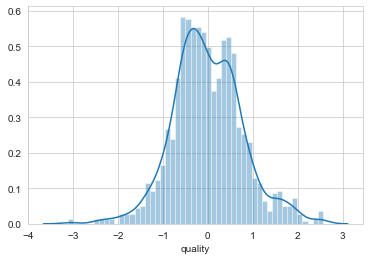

In [128]:
sns.distplot((ym6_test-predictions_m6),bins=50);

In [129]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym6_test, predictions_m6))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym6_test, predictions_m6))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym6_test, predictions_m6)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym6_test, predictions_m6))
print('Explained Variance:', metrics.explained_variance_score(ym6_test, predictions_m6))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym6_test, predictions_m6))
print('Median Absolute Error:', metrics.median_absolute_error(ym6_test, predictions_m6))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym6_test, predictions_m6))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym6_test, predictions_m6))



R-squared: 0.24681211000342873
Mean Squared Error (MSE): 0.6038633245888312
Root Mean Squared Error (RMSE): 0.7770864331519571
Log Mean Squared Error: 0.013239739394785685
Explained Variance: 0.24689573490258032
Mean Absolute Error (MAE): 0.6053745754368878
Median Absolute Error: 0.489449205259584
Poisson Deviance: 0.10341057018076752
Mean Gamma Deviance: 0.01802585302425359


## Model 7: Drop Citric Acid

In [130]:
ym7 = df.quality
Xm7 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid'],axis=1)
from sklearn.model_selection import train_test_split
Xm7_train, Xm7_test, ym7_train, ym7_test = train_test_split(Xm7, ym7, test_size=0.25, random_state=101)
Xm7_train.head()


,volatile_acidity,chlorides,pH,sulphates,alcohol
2287,0.43,0.157,3.17,0.49,9.4
2300,0.30,0.043,3.34,0.44,12.6
3591,0.28,0.053,3.31,0.45,10.8
3614,0.38,0.047,3.11,0.60,9.2
2634,0.31,0.044,2.96,0.88,8.7


In [131]:
Xm7_train.shape

(3673, 5)

In [132]:
from sklearn.linear_model import LinearRegression
lm7 = LinearRegression()
lm7.fit(Xm7_train,ym7_train)
print('Estimated intercept coefficient:',lm7.intercept_)
print ('Number of coefficients:', len(lm7.coef_))
coeffm7_df = pd.DataFrame(lm7.coef_,Xm7.columns,columns=['Coefficient'])
coeffm7_df

Estimated intercept coefficient: 2.6275204385725583
Number of coefficients: 5


,Coefficient
volatile_acidity,-1.898693
chlorides,-1.482716
pH,0.111604
sulphates,0.430672
alcohol,0.312137


In [133]:
predictions_m7 = lm7.predict(Xm7_test)

**Predicted vs. Actual**

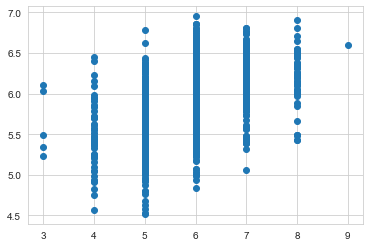

In [134]:
plt.scatter(ym7_test,predictions_m7)

**Residual Histogram**

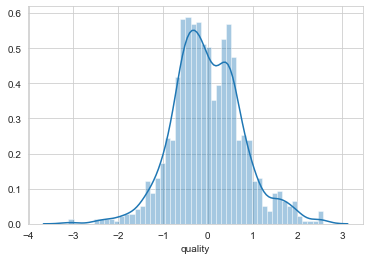

In [135]:
sns.distplot((ym7_test-predictions_m7),bins=50);

In [136]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym7_test, predictions_m7))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym7_test, predictions_m7))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym7_test, predictions_m7)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym7_test, predictions_m7))
print('Explained Variance:', metrics.explained_variance_score(ym7_test, predictions_m7))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym7_test, predictions_m7))
print('Median Absolute Error:', metrics.median_absolute_error(ym7_test, predictions_m7))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym7_test, predictions_m7))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym7_test, predictions_m7))


R-squared: 0.24709891109735438
Mean Squared Error (MSE): 0.6036333837409049
Root Mean Squared Error (RMSE): 0.7769384684393642
Log Mean Squared Error: 0.013234989826494629
Explained Variance: 0.24718897587223843
Mean Absolute Error (MAE): 0.6055662259325575
Median Absolute Error: 0.49206695528555144
Poisson Deviance: 0.10337357501833
Mean Gamma Deviance: 0.01801987038429321


## Model 8: Drop Alcohol

In [137]:
ym8 = df.quality
Xm8 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol'],axis=1)
from sklearn.model_selection import train_test_split
Xm8_train, Xm8_test, ym8_train, ym8_test = train_test_split(Xm8, ym8, test_size=0.25, random_state=101)
Xm8_train.head()

,volatile_acidity,chlorides,pH,sulphates
2287,0.43,0.157,3.17,0.49
2300,0.30,0.043,3.34,0.44
3591,0.28,0.053,3.31,0.45
3614,0.38,0.047,3.11,0.60
2634,0.31,0.044,2.96,0.88


In [138]:
Xm8_train.shape

(3673, 4)

In [139]:
from sklearn.linear_model import LinearRegression
lm8 = LinearRegression()
lm8.fit(Xm8_train,ym8_train)
print('Estimated intercept coefficient:',lm8.intercept_)
print ('Number of coefficients:', len(lm8.coef_))
coeffm8_df = pd.DataFrame(lm8.coef_,Xm8.columns,columns=['Coefficient'])
coeffm8_df

Estimated intercept coefficient: 5.38975028402615
Number of coefficients: 4


,Coefficient
volatile_acidity,-1.521581
chlorides,-7.918050
pH,0.349199
sulphates,0.338893


In [140]:
predictions_m8 = lm8.predict(Xm8_test)

**Predicted vs. Actual**

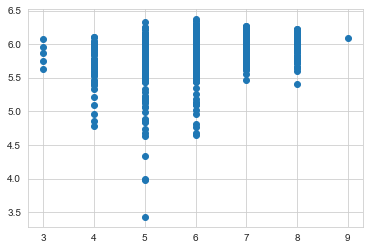

In [141]:
plt.scatter(ym8_test,predictions_m8)

**Residual Histogram**

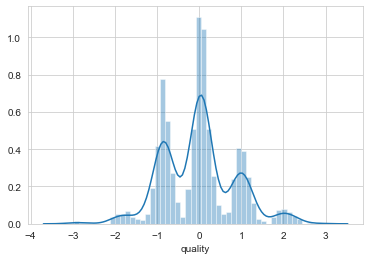

In [142]:
sns.distplot((ym8_test-predictions_m8),bins=50);

In [143]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym8_test, predictions_m8))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym8_test, predictions_m8))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym8_test, predictions_m8)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym8_test, predictions_m8))
print('Explained Variance:', metrics.explained_variance_score(ym8_test, predictions_m8))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym8_test, predictions_m8))
print('Median Absolute Error:', metrics.median_absolute_error(ym8_test, predictions_m8))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym8_test, predictions_m8))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym8_test, predictions_m8))


R-squared: 0.08991527166544455
Mean Squared Error (MSE): 0.7296543093810627
Root Mean Squared Error (RMSE): 0.8541980504432579
Log Mean Squared Error: 0.016065544692430607
Explained Variance: 0.09049503549612081
Mean Absolute Error (MAE): 0.6406116938179214
Median Absolute Error: 0.6687454695785702
Poisson Deviance: 0.12538746858159291
Mean Gamma Deviance: 0.02189750310065115


## Model 9: Drop pH

In [144]:
ym9 = df.quality
Xm9 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH'],axis=1)
from sklearn.model_selection import train_test_split
Xm9_train, Xm9_test, ym9_train, ym9_test = train_test_split(Xm9, ym9, test_size=0.25, random_state=101)
Xm9_train.head()


,volatile_acidity,chlorides,sulphates
2287,0.43,0.157,0.49
2300,0.30,0.043,0.44
3591,0.28,0.053,0.45
3614,0.38,0.047,0.60
2634,0.31,0.044,0.88


In [145]:
Xm9_train.shape

(3673, 3)

In [146]:
from sklearn.linear_model import LinearRegression
lm9 = LinearRegression()
lm9.fit(Xm9_train,ym9_train)
print('Estimated intercept coefficient:',lm9.intercept_)
print ('Number of coefficients:', len(lm9.coef_))
coeffm9_df = pd.DataFrame(lm9.coef_,Xm9.columns,columns=['Coefficient'])
coeffm9_df


Estimated intercept coefficient: 6.480874773732867
Number of coefficients: 3


,Coefficient
volatile_acidity,-1.533369
chlorides,-8.150831
sulphates,0.412238


In [147]:
predictions_m9 = lm9.predict(Xm9_test)

**Predicted vs. Actual**

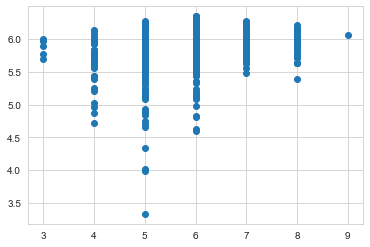

In [148]:
plt.scatter(ym9_test,predictions_m9)

**Residual Histogram**

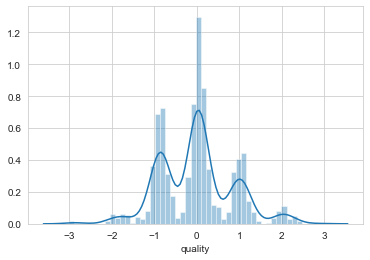

In [149]:
sns.distplot((ym9_test-predictions_m9),bins=50);

In [150]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym9_test, predictions_m9))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym9_test, predictions_m9))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym9_test, predictions_m9)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym9_test, predictions_m9))
print('Explained Variance:', metrics.explained_variance_score(ym9_test, predictions_m9))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym9_test, predictions_m9))
print('Median Absolute Error:', metrics.median_absolute_error(ym9_test, predictions_m9))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym9_test, predictions_m9))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym9_test, predictions_m9))


R-squared: 0.08184116036074818
Mean Squared Error (MSE): 0.7361276738101912
Root Mean Squared Error (RMSE): 0.8579788306305647
Log Mean Squared Error: 0.016198073051312795
Explained Variance: 0.08237405977740564
Mean Absolute Error (MAE): 0.6397752266155057
Median Absolute Error: 0.6839374679615773
Poisson Deviance: 0.1264933810202237
Mean Gamma Deviance: 0.022090467015785518


## Model 10: Drop Sulphates

In [151]:
ym10 = df.quality
Xm10 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH','sulphates'],axis=1)
from sklearn.model_selection import train_test_split
Xm10_train, Xm10_test, ym10_train, ym10_test = train_test_split(Xm10, ym10, test_size=0.25, random_state=101)
Xm10_train.head()


,volatile_acidity,chlorides
2287,0.43,0.157
2300,0.30,0.043
3591,0.28,0.053
3614,0.38,0.047
2634,0.31,0.044


In [152]:
Xm10_train.shape

(3673, 2)

In [153]:
from sklearn.linear_model import LinearRegression
lm10 = LinearRegression()
lm10.fit(Xm10_train,ym10_train)
print('Estimated intercept coefficient:',lm10.intercept_)
print ('Number of coefficients:', len(lm10.coef_))
coeffm10_df = pd.DataFrame(lm10.coef_,Xm10.columns,columns=['Coefficient'])
coeffm10_df

Estimated intercept coefficient: 6.686953520753141
Number of coefficients: 2


,Coefficient
volatile_acidity,-1.551828
chlorides,-8.132977


In [154]:
predictions_m10 = lm10.predict(Xm10_test)

**Predicted vs. Actual**

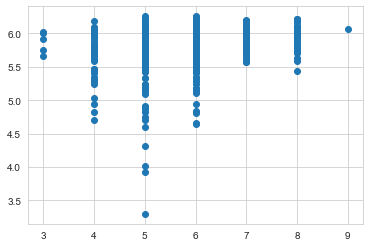

In [155]:
plt.scatter(ym10_test,predictions_m10)

**Residual Histogram**

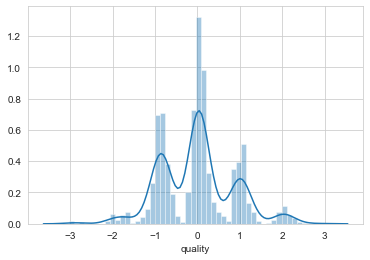

In [156]:
sns.distplot((ym10_test-predictions_m10),bins=50);

In [157]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym10_test, predictions_m10))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym10_test, predictions_m10))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym10_test, predictions_m10)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym10_test, predictions_m10))
print('Explained Variance:', metrics.explained_variance_score(ym10_test, predictions_m10))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym10_test, predictions_m10))
print('Median Absolute Error:', metrics.median_absolute_error(ym10_test, predictions_m10))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym10_test, predictions_m10))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym10_test, predictions_m10))


R-squared: 0.08010152236575996
Mean Squared Error (MSE): 0.7375224168712347
Root Mean Squared Error (RMSE): 0.8587912533737373
Log Mean Squared Error: 0.016238800919236025
Explained Variance: 0.08059930239075308
Mean Absolute Error (MAE): 0.639900324311556
Median Absolute Error: 0.6911748503611017
Poisson Deviance: 0.1267277764085777
Mean Gamma Deviance: 0.022131878083392512


## Model 11: Drop Volatile Activity

In [158]:
ym11 = df.quality
Xm11 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH','sulphates','volatile_acidity'],axis=1)
from sklearn.model_selection import train_test_split
Xm11_train, Xm11_test, ym11_train, ym11_test = train_test_split(Xm11, ym11, test_size=0.25, random_state=101)
Xm11_train.head()


,chlorides
2287,0.157
2300,0.043
3591,0.053
3614,0.047
2634,0.044


In [159]:
Xm11_train.shape

(3673, 1)

In [160]:
from sklearn.linear_model import LinearRegression
lm11 = LinearRegression()
lm11.fit(Xm11_train,ym11_train)
print('Estimated intercept coefficient:',lm11.intercept_)
print ('Number of coefficients:', len(lm11.coef_))
coeffm11_df = pd.DataFrame(lm11.coef_,Xm11.columns,columns=['Coefficient'])
coeffm11_df

Estimated intercept coefficient: 6.283683265269979
Number of coefficients: 1


,Coefficient
chlorides,-8.708


In [161]:
predictions_m11 = lm11.predict(Xm11_test)

**Predicted vs. Actual**

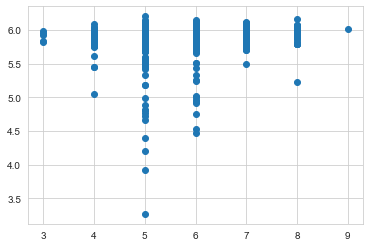

In [162]:
plt.scatter(ym11_test,predictions_m11)

**Residual Histogram**

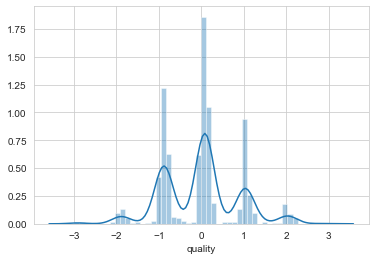

In [163]:
sns.distplot((ym11_test-predictions_m11),bins=50);

In [164]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym11_test, predictions_m11))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym11_test, predictions_m11))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym11_test, predictions_m11)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym11_test, predictions_m11))
print('Explained Variance:', metrics.explained_variance_score(ym11_test, predictions_m11))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym11_test, predictions_m11))
print('Median Absolute Error:', metrics.median_absolute_error(ym11_test, predictions_m11))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym11_test, predictions_m11))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym11_test, predictions_m11))


R-squared: 0.04152810337890955
Mean Squared Error (MSE): 0.7684483960850845
Root Mean Squared Error (RMSE): 0.8766118845219272
Log Mean Squared Error: 0.017038324961598756
Explained Variance: 0.0425584355784695
Mean Absolute Error (MAE): 0.6511638759852955
Median Absolute Error: 0.7960352888401481
Poisson Deviance: 0.13224761152135875
Mean Gamma Deviance: 0.023120430008065063
